# GCE Lab 4 - Dwarf Galaxy - Chemical Evolution Trend

In this notebook, you will tune model parameters to fit the chemical evolution trend derived from stellar spectroscopy, for the dwarf spheroidal galaxy Fornax.

In [1]:
# Import standard Python packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# One-zone galactic chemical evolution code
import NuPyCEE.omega as omega

# Stellar abundances plotting code
import NuPyCEE.stellab as stellab

# Matplotlib option
%matplotlib inline

## 1. Stellar Abundances

To plot the observed stellar abundances of a galaxy, STELLAB first needs to be launched without input parameter.

In [2]:
# Launch the STELLAB code
s = stellab.stellab()

The next step is to select a galaxy. So far, STELLAB includes the Milky Way, Sculptor, Carina, Fornax, and the LMC. Simply use the galaxy parameter and enter the name of the galaxy with lower cases (spaces need to be replaced by underscores). Then, use the plot_spectro function to visualize the selected abundance ratios.

(-1.6, 1.6)

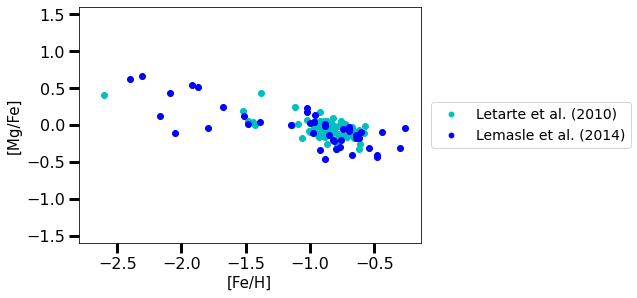

In [3]:
# Select the galaxy
galaxy = "fornax"

# Plot the abundance ratios
matplotlib.rcParams.update({'font.size': 16.0})
s.plot_spectro(galaxy=galaxy, xaxis='[Fe/H]', yaxis='[Mg/Fe]')
plt.ylim(-1.6, 1.6)

## 2. Fit Stellar Abundances with Models

In [4]:
# \\\\\\\\\\ Modify below \\\\\\\\\\\\
# ====================================

# Define the galactic chemical evolution (GCE) parameters

# Dimensionless star formation efficiency (must be below 1.0)
# Original value --> 0.3
sfe = 0.3            

# Strength of galactic outflows
# Original value --> 2.0
mass_loading = 2.0   

# Number of Type Ia supernova that occurs per stellar mass formed
# Original value --> 0.4e-3
nb_1a_per_m = 0.4e-3

# ====================================
# ////////// Modify above ////////////

# Run the GCE code OMEGA
o_1 = omega.omega(galaxy=galaxy, SF_law=True, sfe=sfe, mass_loading=mass_loading, \
                  nb_1a_per_m=nb_1a_per_m, transitionmass=10.0)

OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 0.57s


(-3.2, 0.2)

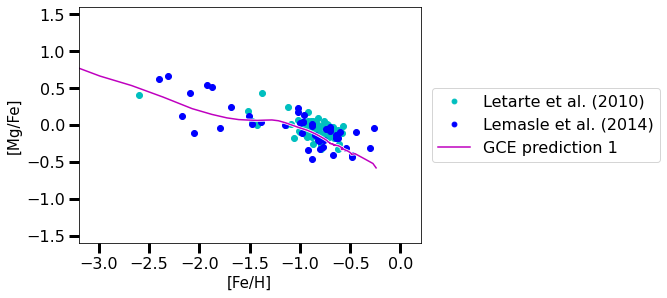

In [5]:
# Choose your elemental abundance ratios
yaxis = '[Mg/Fe]'
xaxis = '[Fe/H]'

# Plot stellar abundances derived from observations
matplotlib.rcParams.update({'font.size': 16.0})
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)

# Overplot the predictions on top of observations
xy_0_1 = o_1.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)
plt.plot(xy_0_1[0],  xy_0_1[1],  color='w', linewidth=3.0)
plt.plot(xy_0_1[0],  xy_0_1[1],  color='m', linewidth=1.5, label='GCE prediction 1')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=16)
plt.ylim(-1.6, 1.6)
plt.xlim(-3.2, 0.2)

## Exercises

* 1) Try to modify **mass_loading**, the strength of galactic outflows (how much gas is removed from the galaxy). Develop an intuition on how outflows affect the numerical predictions.


* 2) Do the same thing with **nb_1a_per_m**, the number of Type Ia supernovae.


* 3) Do the same thing with **sfe**, the star formation efficiency.


* 4) Try to fit [Si/Fe] instead of ["Mg/Fe"]. Are the parameters the same? How do you interpret this experiment?